/tmp/ipython-input-3308873087.py:42: UserWarning:

Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.



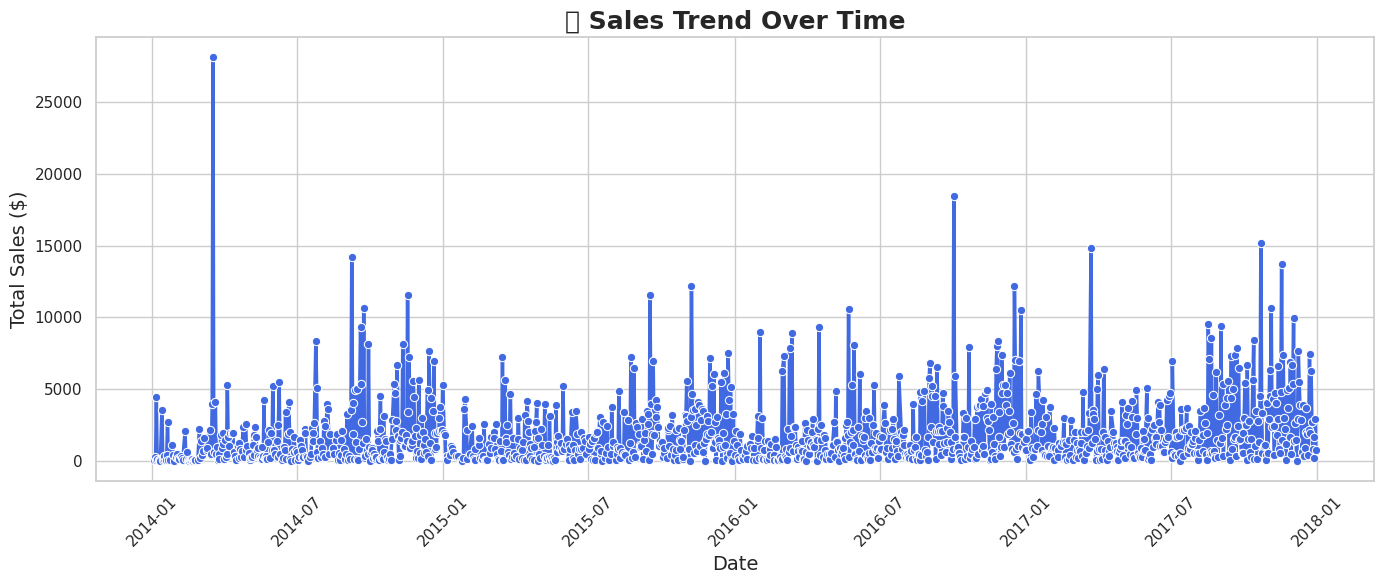

/tmp/ipython-input-3308873087.py:51: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipython-input-3308873087.py:55: UserWarning:

Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.



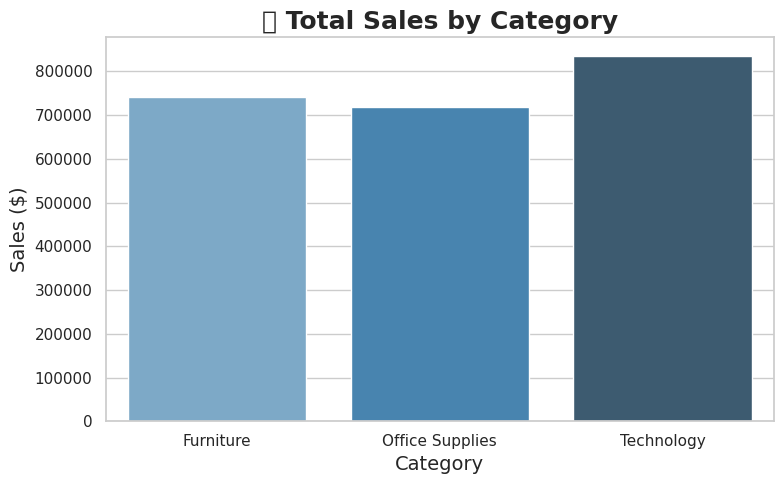

/tmp/ipython-input-3308873087.py:64: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipython-input-3308873087.py:68: UserWarning:

Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.



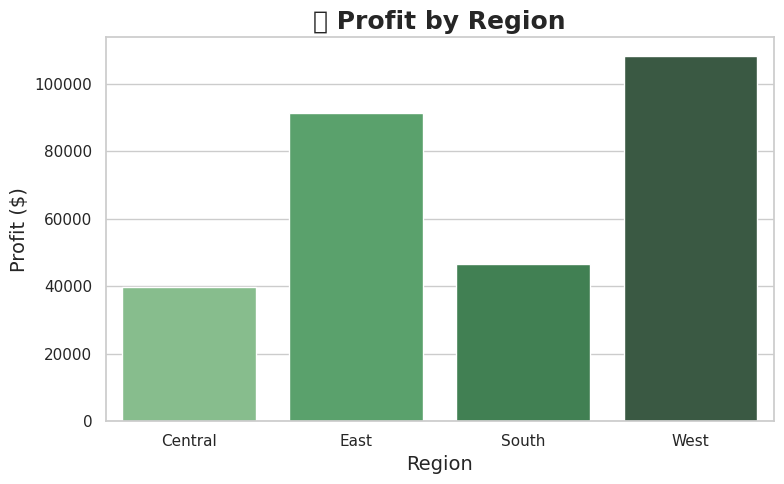

/tmp/ipython-input-3308873087.py:80: UserWarning:

Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.



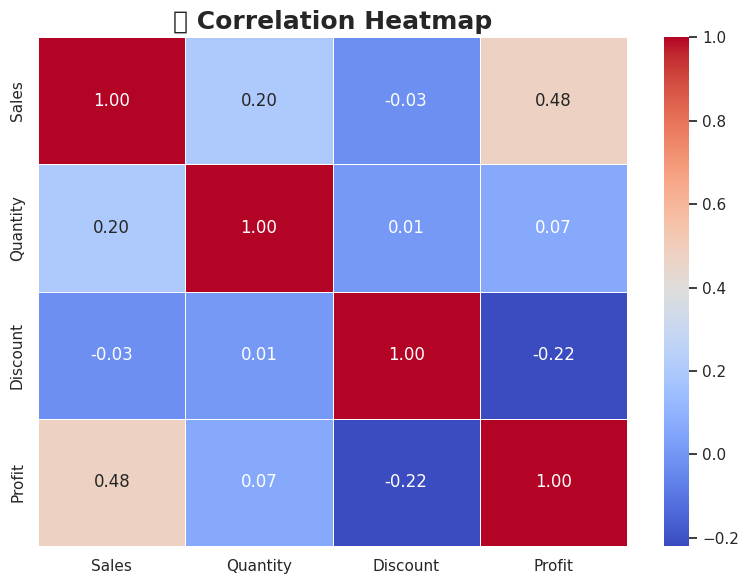

In [4]:
# 📊 Superstore Sales Analysis & Interactive Dashboard (Enhanced)

# ----------------------------
# 1. Import Libraries
# ----------------------------
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from google.colab import files

# ----------------------------
# 2. Load Dataset
# ----------------------------
# uploaded = files.upload()   # Upload "sample_-_superstore .xlsx"
file_path = "/content/sample_-_superstore .xlsx"

orders_df = pd.read_excel(file_path, sheet_name="Orders")

# ----------------------------
# 3. Data Preprocessing
# ----------------------------
orders_df["Order Date"] = pd.to_datetime(orders_df["Order Date"])
orders_df["Ship Date"] = pd.to_datetime(orders_df["Ship Date"])

sns.set_theme(style="whitegrid")

# ----------------------------
# 4. Sales Trend Over Time
# ----------------------------
sales_trend = orders_df.groupby("Order Date")["Sales"].sum().reset_index()

plt.figure(figsize=(14,6))
sns.lineplot(
    x="Order Date", y="Sales", data=sales_trend,
    color="royalblue", linewidth=2.5, marker="o"
)
plt.title("📈 Sales Trend Over Time", fontsize=18, fontweight="bold")
plt.xlabel("Date", fontsize=14)
plt.ylabel("Total Sales ($)", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ----------------------------
# 5. Sales by Category
# ----------------------------
category_sales = orders_df.groupby("Category")["Sales"].sum().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(x="Category", y="Sales", data=category_sales, palette="Blues_d")
plt.title("💰 Total Sales by Category", fontsize=18, fontweight="bold")
plt.xlabel("Category", fontsize=14)
plt.ylabel("Sales ($)", fontsize=14)
plt.tight_layout()
plt.show()

# ----------------------------
# 6. Profit by Region
# ----------------------------
region_profit = orders_df.groupby("Region")["Profit"].sum().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(x="Region", y="Profit", data=region_profit, palette="Greens_d")
plt.title("🏆 Profit by Region", fontsize=18, fontweight="bold")
plt.xlabel("Region", fontsize=14)
plt.ylabel("Profit ($)", fontsize=14)
plt.tight_layout()
plt.show()

# ----------------------------
# 7. Correlation Heatmap
# ----------------------------
plt.figure(figsize=(8,6))
sns.heatmap(
    orders_df[["Sales", "Quantity", "Discount", "Profit"]].corr(),
    annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, cbar=True
)
plt.title("🔗 Correlation Heatmap", fontsize=18, fontweight="bold")
plt.tight_layout()
plt.show()

# ----------------------------
# 8. Interactive Dashboard (Sales Trends)
# ----------------------------
fig = px.line(
    orders_df.groupby(["Order Date","Region","Category"], as_index=False)["Sales"].sum(),
    x="Order Date",
    y="Sales",
    color="Region",
    facet_col="Category",
    markers=True,
    title="📊 Interactive Sales Dashboard (Region & Category)"
)

fig.update_layout(
    xaxis_title="Order Date",
    yaxis_title="Sales ($)",
    legend_title="Region",
    template="plotly_white",
    title_font=dict(size=20, family="Arial", color="black")
)
fig.show()

# ----------------------------
# 9. Interactive Sales Breakdown
# ----------------------------
fig2 = px.bar(
    orders_df.groupby(["Region","Category","Segment"], as_index=False)[["Sales","Profit"]].sum(),
    x="Category",
    y="Sales",
    color="Segment",
    barmode="group",
    facet_col="Region",
    text_auto=".2s",
    title="📦 Sales Breakdown by Category, Segment, and Region"
)

fig2.update_traces(textfont_size=12)
fig2.update_layout(
    template="plotly_white",
    title_font=dict(size=20, family="Arial", color="black"),
    xaxis_title="Category",
    yaxis_title="Sales ($)"
)
fig2.show()
